In [2]:
# Imporrt the libarary
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to split the datasets
from sklearn.model_selection import train_test_split

# multivariate imputation
from sklearn.impute import KNNImputer

In [3]:
df = pd.read_csv('airbnb_listings_usa.csv')

C:\Users\Shgol\AppData\Local\Temp\ipykernel_19564\1204868087.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings_usa.csv')


In [4]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
0,0,183319,Panoramic Ocean View Venice Beach,867995,Barbara X,City of Los Angeles,Venice,33.99211,-118.47600,Entire home/apt,...,30,3,2019-02-25,0.02,2,0,0,NaN,CA,Los Angeles
1,1,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,...,30,2,2016-05-15,0.01,1,139,0,NaN,CA,Los Angeles
2,2,51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,City of Los Angeles,Atwater Village,34.12206,-118.26783,Entire home/apt,...,30,138,2020-12-13,0.98,2,224,0,NaN,CA,Los Angeles
3,3,184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,City of Los Angeles,Venice,33.97487,-118.46312,Entire home/apt,...,30,30,2017-12-24,0.22,1,0,0,NaN,CA,Los Angeles
4,4,51498,Guest House With Its Own Entrance/Exit and Hot...,236758,Bay,City of Los Angeles,Mar Vista,34.00389,-118.44126,Entire home/apt,...,3,378,2022-08-21,2.60,1,348,41,HSR19-001336,CA,Los Angeles


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325858 entries, 0 to 325857
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      325858 non-null  int64  
 1   id                              325858 non-null  int64  
 2   name                            325839 non-null  object 
 3   host_id                         325858 non-null  int64  
 4   host_name                       324714 non-null  object 
 5   neighbourhood_group             155047 non-null  object 
 6   neighbourhood                   325146 non-null  object 
 7   latitude                        325858 non-null  float64
 8   longitude                       325858 non-null  float64
 9   room_type                       325858 non-null  object 
 10  price                           325858 non-null  int64  
 11  minimum_nights                  325858 non-null  int64  
 12  number_of_review

In [6]:
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,325858.000000,3.258580e+05,3.258580e+05,325858.000000,325858.000000,325858.000000,325858.000000,325858.000000,263166.00000,325858.000000,325858.000000,325858.000000
mean,162928.500000,1.541106e+17,1.446528e+08,34.676058,-106.354815,284.915304,13.430175,39.457850,1.69220,27.108900,182.361099,11.889817
std,94067.246346,2.736013e+17,1.449951e+08,6.213029,24.176674,835.569711,28.783033,75.724832,2.01294,79.983052,134.095115,20.672830
min,0.000000,1.090000e+02,2.300000e+01,18.920250,-159.714620,0.000000,1.000000,0.000000,0.01000,1.000000,0.000000,0.000000
25%,81464.250000,2.394619e+07,2.311836e+07,32.775202,-118.410259,97.000000,2.000000,1.000000,0.33000,1.000000,55.000000,0.000000
50%,162928.500000,4.511097e+07,9.320864e+07,34.102360,-117.131590,159.000000,3.000000,9.000000,1.01000,2.000000,174.000000,3.000000
75%,244392.750000,5.420558e+07,2.388338e+08,39.948015,-82.549423,275.000000,30.000000,42.000000,2.49000,12.000000,322.000000,16.000000
max,325857.000000,7.251653e+17,4.810023e+08,47.748000,-70.913250,100000.000000,1250.000000,2600.000000,190.48000,660.000000,365.000000,1284.000000


In [7]:
# Checking for NAN values
np.round(df.isnull().sum() / df.shape[0],3)

Unnamed: 0                        0.000
id                                0.000
name                              0.000
host_id                           0.000
host_name                         0.004
neighbourhood_group               0.524
neighbourhood                     0.002
latitude                          0.000
longitude                         0.000
room_type                         0.000
price                             0.000
minimum_nights                    0.000
number_of_reviews                 0.000
last_review                       0.192
reviews_per_month                 0.192
calculated_host_listings_count    0.000
availability_365                  0.000
number_of_reviews_ltm             0.000
license                           0.734
state                             0.000
city                              0.000
dtype: float64

 Theare are many NAN values in neighbourhood_group column. I want to inspect whether droppping this column is good idea or not.
 

In [8]:
df['neighbourhood_group']

0         City of Los Angeles
1                Other Cities
2         City of Los Angeles
3         City of Los Angeles
4         City of Los Angeles
                 ...         
325853               Delridge
325854               Downtown
325855               Delridge
325856               Delridge
325857         Rainier Valley
Name: neighbourhood_group, Length: 325858, dtype: object

In [9]:
df.loc[:,['neighbourhood_group','neighbourhood','state','city']]

,neighbourhood_group,neighbourhood,state,city
0,City of Los Angeles,Venice,CA,Los Angeles
1,Other Cities,Culver City,CA,Los Angeles
2,City of Los Angeles,Atwater Village,CA,Los Angeles
3,City of Los Angeles,Venice,CA,Los Angeles
4,City of Los Angeles,Mar Vista,CA,Los Angeles
...,...,...,...,...
325853,Delridge,Highland Park,WA,Seattle
325854,Downtown,Central Business District,WA,Seattle
325855,Delridge,South Delridge,WA,Seattle
325856,Delridge,Highland Park,WA,Seattle


In [10]:
df['neighbourhood_group'].nunique()

34

In [11]:
a = df['neighbourhood_group'].nunique()
b = df['neighbourhood'].nunique()
c = df['state'].nunique()
d = df['city'].nunique()

print(f'There are {a} unique values in neighbourhood_group column.')
print(f'There are {b} unique values in neighbourhood column.')
print(f'There are {c} unique values in state column.')
print(f'There are {d} unique values in city column.')

There are 34 unique values in neighbourhood_group column.
There are 1575 unique values in neighbourhood column.
There are 19 unique values in state column.
There are 31 unique values in city column.


Appafently , there are high cardinality in neighbourhood column.
This causes a problem later on  especially when using tree based algorithm. 
Or, simply encoding this column expands feature dimentions. 
Firstly, I try to fill the missing value in neighbourhood_group column by using neighbourhood column knowledge.

In [12]:
df['neighbourhood_group'].unique()

array(['City of Los Angeles', 'Other Cities', 'Unincorporated Areas', nan,
       'Hawaii', 'Maui', 'Honolulu', 'Kauai', 'Brooklyn', 'Queens',
       'Bronx', 'Manhattan', 'Staten Island', 'Providence', 'Washington',
       'Newport', 'Bristol', 'Kent', 'Lake City', 'Rainier Valley',
       'West Seattle', 'Northgate', 'Delridge', 'Cascade',
       'Other neighborhoods', 'Central Area', 'Capitol Hill',
       'Seward Park', 'Ballard', 'Queen Anne', 'Magnolia', 'Beacon Hill',
       'Downtown', 'University District', 'Interbay'], dtype=object)

<AxesSubplot: >

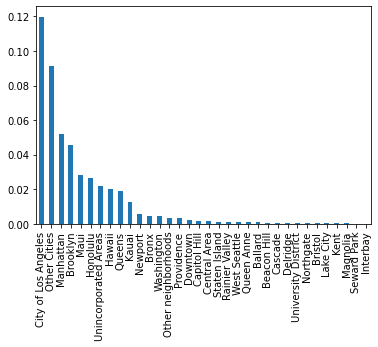

In [13]:
(df['neighbourhood_group'].value_counts()/df.shape[0]).plot.bar()

In [14]:
  df[df['neighbourhood_group']=='City of Los Angeles']['neighbourhood'].unique()

array(['Venice', 'Atwater Village', 'Mar Vista', 'Hollywood',
       'Westchester', 'Hollywood Hills', 'Hollywood Hills West',
       'Del Rey', 'Carthay', 'Woodland Hills', 'Palms', 'Echo Park',
       'Pico-Robertson', 'Silver Lake', 'Fairfax', 'Sawtelle',
       'Mid-Wilshire', 'Mid-City', 'Encino', 'Sun Valley',
       'Valley Village', 'Pacific Palisades', 'Koreatown', 'Tujunga',
       'San Pedro', 'Beverly Grove', 'Highland Park', 'West Los Angeles',
       'Studio City', 'Mount Washington', 'Westlake', 'North Hollywood',
       'Beverly Crest', 'Downtown', 'East Hollywood', 'Valley Glen',
       'Arlington Heights', 'Harvard Heights', 'Elysian Valley',
       'Van Nuys', 'Sherman Oaks', 'Leimert Park', 'Lake Balboa',
       'Broadway-Manchester', 'Hancock Park', 'Lincoln Heights',
       'Brentwood', 'Los Feliz', 'Canoga Park', 'Eagle Rock',
       'Glassell Park', 'Westwood', 'Rancho Park', 'Winnetka', 'Reseda',
       'Boyle Heights', 'Harbor City', 'Panorama City', 'Playa de

In [15]:
df[df['neighbourhood_group'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
1382,1382,43431494,Holiday Inn Express Anaheim West,345958979,General Manager,NaN,Anaheim,33.820870,-117.994620,Private room,...,1,63,2022-08-21,2.23,5,86,34,Exempt,CA,Los Angeles
1708,1708,634113657500905890,Modern spacious 2 bedroom loft with pool,433070514,Brandon,NaN,Santa Ana,33.698660,-117.864410,Entire home/apt,...,1,0,NaN,NaN,1,365,0,NaN,CA,Los Angeles
1743,1743,697220956075781185,Beside irvine/2bedroom Apt/Pool/kitchen,208338279,Jessica,NaN,Tustin,33.702709,-117.819033,Entire home/apt,...,2,0,NaN,NaN,20,365,0,NaN,CA,Los Angeles
2123,2123,693830448291911021,CLEAN/DISINFECTED Elegant Home in Fullerton (p56),348745371,Zanoza,NaN,Fullerton,33.855420,-117.951484,Entire home/apt,...,30,0,NaN,NaN,51,309,0,NaN,CA,Los Angeles
2293,2293,554359150057799080,3 Bedrooms No 8,25617178,Adam,NaN,Irvine,33.702370,-117.734830,Entire home/apt,...,30,0,NaN,NaN,36,365,0,NaN,CA,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319949,319949,712473093936480004,Quiet Cozy and Convenient!,477126370,Karren,NaN,NaN,32.740780,-97.237760,Entire home/apt,...,1,0,NaN,NaN,1,171,0,NaN,TX,Fort Worth
319950,319950,712949561846640513,Best Location! Model Home. Steps to Dickies Ar...,8783642,Mario & Ivette,NaN,NaN,32.736096,-97.371548,Entire home/apt,...,2,0,NaN,NaN,2,298,0,NaN,TX,Fort Worth
319951,319951,713039877541540614,For females that want to rent on a monthly basis!,412943781,Arshini,NaN,NaN,32.781430,-97.354479,Private room,...,30,0,NaN,NaN,1,364,0,NaN,TX,Fort Worth
319952,319952,713054506384843935,Charming two-bedroom home near Downtown/Stocky...,41505591,Sam,NaN,NaN,32.789940,-97.313002,Entire home/apt,...,2,0,NaN,NaN,1,328,0,NaN,TX,Fort Worth


In [16]:
df[df['neighbourhood']=='Anaheim']['neighbourhood_group'].isna().sum()

2038

In [17]:
df[df['neighbourhood']=='Area 2/MIT']['neighbourhood_group']

204381    NaN
204420    NaN
204423    NaN
204436    NaN
204458    NaN
         ... 
207457    NaN
207458    NaN
207460    NaN
207463    NaN
207466    NaN
Name: neighbourhood_group, Length: 923, dtype: object

In [18]:
df[df['neighbourhood_group'].isna()].sample(n=20)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
203430,203430,582003866159613526,Lovely 3 Bed/1Ba apt close to airport and Boston,101146122,Niraj,NaN,East Boston,42.391140,-71.028450,Entire home/apt,...,1,22,2022-09-11,4.26,1,33,22,NaN,MA,Boston
196311,196311,45363644,Sleep with Audrey Hepburn & John Lennon in the FQ,210721312,Leddy,NaN,French Quarter,29.952160,-90.064990,Entire home/apt,...,1,71,2022-07-29,3.22,11,218,41,"19STR-00791, 19-OSTR-00441",LA,New Orleans
111861,111861,27627816,SF Private One-Bedroom In-Law,62528658,Steve,NaN,Crocker Amazon,37.708550,-122.437450,Entire home/apt,...,1,19,2019-01-21,0.38,2,0,0,STR-0004531,CA,San Francisco
213482,213482,47311262,Private Home in Asheville Near French Broad River,356531815,Foley Realty,NaN,28804,35.624790,-82.611990,Entire home/apt,...,3,20,2021-11-27,1.00,1,0,3,NaN,NC,Asheville
208715,208715,25783589,Private Lower Level Suite with Luxury Bath,51031874,Jared,NaN,Hennepin,44.996560,-93.306670,Private room,...,2,153,2022-09-11,2.95,1,68,15,STR-396410,MN,Twin Cities MSA
197189,197189,51454229,Uptown Funk! | 10 beds | Big Yard for Groups,206412631,Benjamin,NaN,Audubon,29.938090,-90.112100,Entire home/apt,...,3,27,2022-09-05,2.07,1,137,26,"21RSTR-08633, 21OSTR-11444",LA,New Orleans
106668,106668,689168002596170766,"Beautiful 4 bedroom Home! Mission Bay, Bay Park",468369202,Jim,NaN,Bay Park,32.774510,-117.205570,Entire home/apt,...,1,0,NaN,NaN,1,360,0,NaN,CA,San Diego
128014,128014,18756372,Quiet Country in the City,130500720,Gordon,NaN,Hampden South,39.614180,-104.883320,Private room,...,1,137,2022-09-18,2.12,1,361,44,NaN,CO,Denver
191698,191698,700824431125902577,Safe Haven,138987568,Yelitza,NaN,Greater Grand Crossing,41.754029,-87.618580,Private room,...,1,0,NaN,NaN,1,328,0,R22000086273,IL,Chicago
224142,224142,44599896,1800 SqFt House W/Heated Pool Spa 13Min From S...,125383819,Vladislav,NaN,City of Henderson,36.035530,-115.113320,Entire home/apt,...,2,112,2022-09-08,4.38,5,145,45,STR20-00127,NV,Clark County


In [42]:
df.loc[:,['latitude','longitude']]

,latitude,longitude
0,33.992110,-118.476000
1,33.983010,-118.386070
2,34.122060,-118.267830
3,33.974870,-118.463120
4,34.003890,-118.441260
...,...,...
325853,47.504459,-122.348915
325854,47.606606,-122.341684
325855,47.513300,-122.355450
325856,47.512220,-122.328250


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

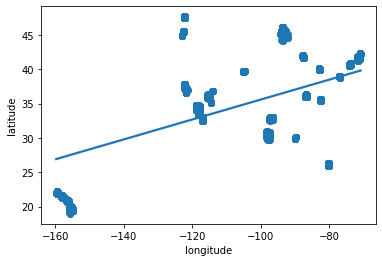

In [20]:
# Check how longitude and latitude are distributed.
sns.regplot(x=df["longitude"], y=df["latitude"])

# Missing value imputation

As sI mentioned there are many missing value in neighbourhood_group column
Just doing mean or frequent category imputation does not work in this case, because of the scale of the missing data.
I can rely on other information to impute this column 
Here, I use longitude and latitude to look guess the missing information, which makes logical sense.

In [50]:
# Preserve the id of the column which has missing value in neighbourhood_group column
id_group_missing = df[df['neighbourhood_group'].isna()].id.tolist()

In [53]:
# I make the temporaly table so that mapping for neighbourhood_group column does not include nan value
# Nan is what I want to fill correctly later on, leave them as they are
temp = df[df['neighbourhood_group'].notna()]

In [54]:
mapping = {
    k: i
    for i, k in enumerate(temp['neighbourhood_group'].unique(), 0)
}
mapping

{'City of Los Angeles': 0,
 'Other Cities': 1,
 'Unincorporated Areas': 2,
 'Hawaii': 3,
 'Maui': 4,
 'Honolulu': 5,
 'Kauai': 6,
 'Brooklyn': 7,
 'Queens': 8,
 'Bronx': 9,
 'Manhattan': 10,
 'Staten Island': 11,
 'Providence': 12,
 'Washington': 13,
 'Newport': 14,
 'Bristol': 15,
 'Kent': 16,
 'Lake City': 17,
 'Rainier Valley': 18,
 'West Seattle': 19,
 'Northgate': 20,
 'Delridge': 21,
 'Cascade': 22,
 'Other neighborhoods': 23,
 'Central Area': 24,
 'Capitol Hill': 25,
 'Seward Park': 26,
 'Ballard': 27,
 'Queen Anne': 28,
 'Magnolia': 29,
 'Beacon Hill': 30,
 'Downtown': 31,
 'University District': 32,
 'Interbay': 33}

In [55]:
df['neighbourhood_group'] = df['neighbourhood_group'].map(mapping)
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
0,0,183319,Panoramic Ocean View Venice Beach,867995,Barbara X,0.0,Venice,33.992110,-118.476000,Entire home/apt,...,30,3,2019-02-25,0.02,2,0,0,NaN,CA,Los Angeles
1,1,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,1.0,Culver City,33.983010,-118.386070,Entire home/apt,...,30,2,2016-05-15,0.01,1,139,0,NaN,CA,Los Angeles
2,2,51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,0.0,Atwater Village,34.122060,-118.267830,Entire home/apt,...,30,138,2020-12-13,0.98,2,224,0,NaN,CA,Los Angeles
3,3,184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,0.0,Venice,33.974870,-118.463120,Entire home/apt,...,30,30,2017-12-24,0.22,1,0,0,NaN,CA,Los Angeles
4,4,51498,Guest House With Its Own Entrance/Exit and Hot...,236758,Bay,0.0,Mar Vista,34.003890,-118.441260,Entire home/apt,...,3,378,2022-08-21,2.60,1,348,41,HSR19-001336,CA,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325853,325853,45079266,White Center studio with kitchenette and bath,890326,Timothy,21.0,Highland Park,47.504459,-122.348915,Entire home/apt,...,3,16,2022-08-08,1.10,1,0,7,NaN,WA,Seattle
325854,325854,664956215516199232,Lovely 1-bedroom condo next door to Gum Wall,48416955,Jessica,31.0,Central Business District,47.606606,-122.341684,Entire home/apt,...,1,22,2022-09-12,9.17,3,6,22,STR-OPLI-19-001663,WA,Seattle
325855,325855,49692446,Home away from home,268690467,Jose Manuel,21.0,South Delridge,47.513300,-122.355450,Entire home/apt,...,3,5,2022-08-28,0.36,1,0,2,NaN,WA,Seattle
325856,325856,50035217,Brick duplex- 10 min to downtown- 10 min to SE...,403563664,Dan,21.0,Highland Park,47.512220,-122.328250,Entire home/apt,...,1,21,2022-08-23,1.33,1,0,19,NaN,WA,Seattle


In [60]:
#I again create the temporsly table to use longitude and latitude as predictors of missing value in neighbourhood_group
temp_2 = df.loc[:,['neighbourhood_group','latitude','longitude']]
temp_2.head()

,neighbourhood_group,latitude,longitude
0,0.0,33.99211,-118.47600
1,1.0,33.98301,-118.38607
2,0.0,34.12206,-118.26783
3,0.0,33.97487,-118.46312
4,0.0,34.00389,-118.44126


In [61]:
# KNN imputer
imputer = KNNImputer(
    n_neighbors=5, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

In [62]:
imputer.fit(temp_2)

KNNImputer(weights='distance')

In [66]:
temp_2_2 = imputer.transform(temp_2)


In [67]:
temp_2_2 = pd.DataFrame(temp_2_2, columns=temp_2.columns)
temp_2_2

,neighbourhood_group,latitude,longitude
0,0.0,33.992110,-118.476000
1,1.0,33.983010,-118.386070
2,0.0,34.122060,-118.267830
3,0.0,33.974870,-118.463120
4,0.0,34.003890,-118.441260
...,...,...,...
325853,21.0,47.504459,-122.348915
325854,31.0,47.606606,-122.341684
325855,21.0,47.513300,-122.355450
325856,21.0,47.512220,-122.328250


In [73]:
# also check whether the imputed value is ok

In [75]:
inv_map = {v: k for k, v in mapping.items()}
inv_map

{0: 'City of Los Angeles',
 1: 'Other Cities',
 2: 'Unincorporated Areas',
 3: 'Hawaii',
 4: 'Maui',
 5: 'Honolulu',
 6: 'Kauai',
 7: 'Brooklyn',
 8: 'Queens',
 9: 'Bronx',
 10: 'Manhattan',
 11: 'Staten Island',
 12: 'Providence',
 13: 'Washington',
 14: 'Newport',
 15: 'Bristol',
 16: 'Kent',
 17: 'Lake City',
 18: 'Rainier Valley',
 19: 'West Seattle',
 20: 'Northgate',
 21: 'Delridge',
 22: 'Cascade',
 23: 'Other neighborhoods',
 24: 'Central Area',
 25: 'Capitol Hill',
 26: 'Seward Park',
 27: 'Ballard',
 28: 'Queen Anne',
 29: 'Magnolia',
 30: 'Beacon Hill',
 31: 'Downtown',
 32: 'University District',
 33: 'Interbay'}

In [83]:
temp_2_2['Name'] = temp_2_2['neighbourhood_group'].map(inv_map)


,neighbourhood_group,latitude,longitude,Name
0,0.0,33.992110,-118.476000,City of Los Angeles
1,1.0,33.983010,-118.386070,Other Cities
2,0.0,34.122060,-118.267830,City of Los Angeles
3,0.0,33.974870,-118.463120,City of Los Angeles
4,0.0,34.003890,-118.441260,City of Los Angeles
...,...,...,...,...
325853,21.0,47.504459,-122.348915,Delridge
325854,31.0,47.606606,-122.341684,Downtown
325855,21.0,47.513300,-122.355450,Delridge
325856,21.0,47.512220,-122.328250,Delridge


In [97]:
temp_2_2['neighbourhood_group'].sample(n=20)

158852     3.000000
20172      0.000000
28647      1.000000
45182      1.000000
242150     7.000000
184257     4.000000
249247     7.000000
117278     2.000000
195609    11.000000
82595      0.000000
99858      1.000000
172858     6.000000
146778    11.000000
46386      0.000000
287542    11.000000
116909     2.000000
38993      1.812537
87792      1.000000
92120      2.000000
270153     7.000000
Name: neighbourhood_group, dtype: float64

In [98]:
# there are some values which is not integer.
# These values shoud be the nearest integer 
temp_2_2['neighbourhood_group']= round(temp_2_2['neighbourhood_group'])

In [99]:
temp_2_2['neighbourhood_group'].nunique()

34

Now , all the values are integers

In [100]:
inv_map = {v: k for k, v in mapping.items()}
inv_map

{0: 'City of Los Angeles',
 1: 'Other Cities',
 2: 'Unincorporated Areas',
 3: 'Hawaii',
 4: 'Maui',
 5: 'Honolulu',
 6: 'Kauai',
 7: 'Brooklyn',
 8: 'Queens',
 9: 'Bronx',
 10: 'Manhattan',
 11: 'Staten Island',
 12: 'Providence',
 13: 'Washington',
 14: 'Newport',
 15: 'Bristol',
 16: 'Kent',
 17: 'Lake City',
 18: 'Rainier Valley',
 19: 'West Seattle',
 20: 'Northgate',
 21: 'Delridge',
 22: 'Cascade',
 23: 'Other neighborhoods',
 24: 'Central Area',
 25: 'Capitol Hill',
 26: 'Seward Park',
 27: 'Ballard',
 28: 'Queen Anne',
 29: 'Magnolia',
 30: 'Beacon Hill',
 31: 'Downtown',
 32: 'University District',
 33: 'Interbay'}

In [101]:
temp_2_2['Name'] = temp_2_2['neighbourhood_group'].map(inv_map)
temp_2_2

,neighbourhood_group,latitude,longitude,Name
0,0.0,33.992110,-118.476000,City of Los Angeles
1,1.0,33.983010,-118.386070,Other Cities
2,0.0,34.122060,-118.267830,City of Los Angeles
3,0.0,33.974870,-118.463120,City of Los Angeles
4,0.0,34.003890,-118.441260,City of Los Angeles
...,...,...,...,...
325853,21.0,47.504459,-122.348915,Delridge
325854,31.0,47.606606,-122.341684,Downtown
325855,21.0,47.513300,-122.355450,Delridge
325856,21.0,47.512220,-122.328250,Delridge


In [104]:
temp_2_2['Name'].isna().sum()

0

In [108]:
df['neighbourhood_group'] = temp_2_2['Name']
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,state,city
0,0,183319,Panoramic Ocean View Venice Beach,867995,Barbara X,City of Los Angeles,Venice,33.99211,-118.47600,Entire home/apt,...,30,3,2019-02-25,0.02,2,0,0,NaN,CA,Los Angeles
1,1,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,...,30,2,2016-05-15,0.01,1,139,0,NaN,CA,Los Angeles
2,2,51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,City of Los Angeles,Atwater Village,34.12206,-118.26783,Entire home/apt,...,30,138,2020-12-13,0.98,2,224,0,NaN,CA,Los Angeles
3,3,184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,City of Los Angeles,Venice,33.97487,-118.46312,Entire home/apt,...,30,30,2017-12-24,0.22,1,0,0,NaN,CA,Los Angeles
4,4,51498,Guest House With Its Own Entrance/Exit and Hot...,236758,Bay,City of Los Angeles,Mar Vista,34.00389,-118.44126,Entire home/apt,...,3,378,2022-08-21,2.60,1,348,41,HSR19-001336,CA,Los Angeles


In [110]:
df[df['id'].isin(id_group_missing)]['neighbourhood_group'].value_counts()

Unincorporated Areas    73800
Staten Island           56284
Other Cities            25067
Providence               8274
West Seattle             4500
Manhattan                3687
Rainier Valley            373
Brooklyn                    2
Name: neighbourhood_group, dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325858 entries, 0 to 325857
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      325858 non-null  int64  
 1   id                              325858 non-null  int64  
 2   name                            325839 non-null  object 
 3   host_id                         325858 non-null  int64  
 4   host_name                       324714 non-null  object 
 5   neighbourhood_group             325858 non-null  object 
 6   neighbourhood                   325146 non-null  object 
 7   latitude                        325858 non-null  float64
 8   longitude                       325858 non-null  float64
 9   room_type                       325858 non-null  object 
 10  price                           325858 non-null  int64  
 11  minimum_nights                  325858 non-null  int64  
 12  number_of_review

In [222]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
name                                  19
host_id                                0
host_name                           1144
neighbourhood_group                    0
neighbourhood                        712
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        62692
reviews_per_month                  62692
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
license                           239223
state                                  0
city                                   0
dtype: int64

In [133]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [149]:
from matplotlib.pyplot import figure


In [179]:
aggregate = df.groupby('last_review').count()

In [180]:
#plt.figure(figsize=(20,20))
#plt.plot(aggregate)
#plt.xlim('2022-01-01','2023-01-01')
#plt.show()

In [184]:
df['reviews_per_month'].describe()

count    263166.00000
mean          1.69220
std           2.01294
min           0.01000
25%           0.33000
50%           1.01000
75%           2.49000
max         190.48000
Name: reviews_per_month, dtype: float64

In [190]:
# relationship between the number of reviews and price
#sns.regplot(x=df['reviews_per_month'], y=df['price'])
#plt.ylim(0,30000)
#plt.show()

In [192]:
df['room_type'].value_counts()

Entire home/apt    243098
Private room        77616
Shared room          3730
Hotel room           1414
Name: room_type, dtype: int64

In [195]:
# price difference by the room_type
df.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,243098.0,318.748134,783.913130,1.0,125.00,190.0,305.0,100000.0
Hotel room,1414.0,676.684583,1096.237552,0.0,144.25,269.0,615.5,10000.0
Private room,77616.0,181.703399,979.620406,0.0,55.00,79.0,121.0,100000.0
Shared room,3730.0,79.081501,349.674728,10.0,28.00,39.0,60.0,10000.0


There are clear differences in price by the room_type

In [197]:
df['minimum_nights'].describe()

count    325858.000000
mean         13.430175
std          28.783033
min           1.000000
25%           2.000000
50%           3.000000
75%          30.000000
max        1250.000000
Name: minimum_nights, dtype: float64

In [219]:
A = pd.DataFrame(df['minimum_nights'].quantile(np.arange(0,1.01,0.1)))
A
# Outlier engineering

,minimum_nights
0.0,1.0
0.1,1.0
0.2,1.0
0.3,2.0
0.4,2.0
0.5,3.0
0.6,4.0
0.7,29.0
0.8,30.0
0.9,30.0


In [218]:
df['number_of_reviews'].describe()

count    325858.000000
mean         39.457850
std          75.724832
min           0.000000
25%           1.000000
50%           9.000000
75%          42.000000
max        2600.000000
Name: number_of_reviews, dtype: float64

In [220]:
df['number_of_reviews'].quantile(np.arange(0,1.01,0.1))

0.0       0.0
0.1       0.0
0.2       1.0
0.3       2.0
0.4       5.0
0.5       9.0
0.6      17.0
0.7      31.0
0.8      57.0
0.9     116.0
1.0    2600.0
Name: number_of_reviews, dtype: float64

In [224]:
df['reviews_per_month'].quantile(np.arange(0,1.01,0.1))

0.0      0.01
0.1      0.11
0.2      0.25
0.3      0.43
0.4      0.71
0.5      1.01
0.6      1.53
0.7      2.11
0.8      2.93
0.9      4.11
1.0    190.48
Name: reviews_per_month, dtype: float64

In [226]:
df['calculated_host_listings_count'].quantile(np.arange(0,1.01,0.1))

0.0      1.0
0.1      1.0
0.2      1.0
0.3      1.0
0.4      2.0
0.5      2.0
0.6      4.0
0.7      8.0
0.8     19.0
0.9     58.0
1.0    660.0
Name: calculated_host_listings_count, dtype: float64

In [227]:
df['availability_365'].quantile(np.arange(0,1.01,0.1))

0.0      0.0
0.1      0.0
0.2     26.0
0.3     76.0
0.4    125.0
0.5    174.0
0.6    249.0
0.7    303.0
0.8    337.0
0.9    358.0
1.0    365.0
Name: availability_365, dtype: float64

In [228]:
df['number_of_reviews_ltm'].quantile(np.arange(0,1.01,0.1))

0.0       0.0
0.1       0.0
0.2       0.0
0.3       0.0
0.4       1.0
0.5       3.0
0.6       6.0
0.7      12.0
0.8      21.0
0.9      37.0
1.0    1284.0
Name: number_of_reviews_ltm, dtype: float64

In [ ]:
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
license                           239223
state                                  0
city                                   0

In [25]:
def calculate_mean_house_price(col):
    total_houses = len(df)
    
    new_df = pd.Series(df[col].value_counts() / total_houses).reset_index()
    new_df.columns = [col, '%house']
    # Adding the mean price
    new_df = new_df.merge(df.groupby([col])['price'].mean().reset_index(),
                          on=col,
                          how='left')
    return new_df

In [26]:
nei_group_price = calculate_mean_house_price('neighbourhood')
nei_group_price = nei_group_price.sort_values(by='%house', ascending=False)
nei_group_price

,neighbourhood,%house,price
0,Unincorporated Areas,0.041122,419.525896
1,Hollywood,0.023071,232.466214
2,Primary Urban Center,0.019091,344.110593
3,Lahaina,0.013567,839.190228
4,Kihei-Makena,0.012472,511.332185
...,...,...,...
1550,Mills College,0.000003,59.000000
1549,Eastmoreland/Reed,0.000003,125.000000
1548,Waverly,0.000003,100.000000
1547,Ferry Point Park,0.000003,225.000000


In [27]:
nei_price = calculate_mean_house_price('neighbourhood_group').sort_values(by='%house')
nei_price

,neighbourhood_group,%house,price
33,Interbay,0.000120,136.897436
32,Seward Park,0.000157,188.901961
31,Magnolia,0.000285,194.688172
30,Kent,0.000423,173.297101
29,Lake City,0.000427,161.561151
28,Bristol,0.000552,280.300000
27,Northgate,0.000608,132.772727
26,University District,0.000620,138.128713
25,Delridge,0.000730,148.424370
24,Cascade,0.000783,191.972549


In [28]:
df[df['neighbourhood']=='Coliseum Industrial']['price']

92921    129
Name: price, dtype: int64

In [29]:
neighborhood = pd.DataFrame(df['neighbourhood'].value_counts())

In [30]:
nei_group_price

,neighbourhood,%house,price
0,Unincorporated Areas,0.041122,419.525896
1,Hollywood,0.023071,232.466214
2,Primary Urban Center,0.019091,344.110593
3,Lahaina,0.013567,839.190228
4,Kihei-Makena,0.012472,511.332185
...,...,...,...
1550,Mills College,0.000003,59.000000
1549,Eastmoreland/Reed,0.000003,125.000000
1548,Waverly,0.000003,100.000000
1547,Ferry Point Park,0.000003,225.000000
